# 라이러러리

In [1]:
!pip install pycaret
!pip install catboost

     |████████████████████████████████| 263 kB 23.8 MB/s 
     |████████████████████████████████| 248 kB 52.5 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 43.1 MB/s 
     |████████████████████████████████| 6.8 MB 59.7 MB/s 
     |████████████████████████████████| 105 kB 54.0 MB/s 
     |████████████████████████████████| 14.4 MB 61 kB/s 
     |████████████████████████████████| 1.7 MB 61.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 66.2 MB/s 
     |████████████████████████████████| 271 kB 66.6 MB/s 
     |████████████████████████████████| 2.0 MB 70.0 MB/s 
     |████████████████████████████████| 636 kB 61.3 MB/s 
     |████████████████████████████████| 1.1 MB 70.0 MB/s 
     |██████████████████

In [2]:
!pip install optuna

     |████████████████████████████████| 301 kB 31.9 MB/s 
     |████████████████████████████████| 80 kB 10.3 MB/s 
     |████████████████████████████████| 141 kB 64.6 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 111 kB 57.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f2559d16c2d67c9306968111c00a962a4dd8d3e8a26279d704dedf55734ba563
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [37]:
# 라이브러리
import pandas as pd
import numpy as np
import tqdm as tq
import pickle
import matplotlib.pyplot as plt
import optuna

from pycaret.regression import *
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# 데이터 탐색

In [2]:
train = pd.read_csv('/content/drive/MyDrive/contest/parking_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/contest/parking_data/test.csv')
age_gender = pd.read_csv('/content/drive/MyDrive/contest/parking_data/age_gender_info.csv')

### 훈련 데이터

In [3]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
train.corr(method='pearson')

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.068192,0.213843,-0.001446,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,-0.089201,-0.013111,-0.007866,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.166472,-0.056680,0.047112,0.281989,0.247085
공가수,0.068192,-0.089201,0.166472,1.000000,-0.093334,0.043285,0.289819,0.118121
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.213843,-0.013111,-0.056680,-0.093334,1.000000,0.098380,-0.055544,-0.108592
도보 10분거리 내 버스정류장 수,-0.001446,-0.007866,0.047112,0.043285,0.098380,1.000000,0.070696,0.103752
단지내주차면수,0.501488,0.071260,0.281989,0.289819,-0.055544,0.070696,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.118121,-0.108592,0.103752,0.859216,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

< Train data null 값 >

임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수

In [6]:
train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,569


### 테스트 데이터

In [7]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [9]:
test.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
count,1022.000000,1022.000000,1022.000000,1022.000000,980.000000,1022.000000,1022.000000
mean,862.080235,43.706311,100.414873,15.544031,0.136735,4.626223,548.771037
std,536.340894,35.890759,125.997855,11.070140,0.435500,5.414568,342.636703
min,75.000000,9.960000,1.000000,0.000000,0.000000,1.000000,29.000000
25%,488.000000,33.135000,14.000000,6.000000,0.000000,2.000000,286.000000
50%,745.000000,39.720000,60.000000,15.000000,0.000000,3.000000,458.000000
75%,1161.000000,47.400000,140.000000,23.000000,0.000000,5.000000,711.000000
max,2572.000000,583.400000,1341.000000,45.000000,2.000000,50.000000,1696.000000


In [10]:
test.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,2
임대보증금,180


< Test data null 값 >

자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)

Train, Test null 값을 보면

임대보증금, 임대료는 같이 null값으로 존재할 것으로 생각할 수 있음

# 데이터 전처리

[ https://dacon.io/competitions/official/235745/codeshare/2853?page=1&dtype=recent ] 참고


임대가 아닌 공공분양, 전세 같은 경우는 임대 관련 값은 NA

임대보증금, 임대료를 0으로 대체

In [11]:
# 임대관련 값 '-'을 null로 바꾼 후 float로 타입 변경
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# 임대관련 값 0으로 대체 
train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

임대보증금, 임대료 dtype을 int로 변경

지하철 및 버스정류장 수 관련 Null 값도 없는 것으로 추정하고 0으로 대체

In [12]:
# 지하철 및 버스정류장 수 0으로 대체
cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

test data의 자격유형은 최빈값으로 대체 

==> 'A'

In [13]:
test['자격유형'].value_counts() # A가 가장 많음을 확인

A    572
D    180
H     92
J     84
C     34
K     16
L     12
N     10
E     10
I      7
M      2
G      1
Name: 자격유형, dtype: int64

In [14]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

중복이 상당히 많은 것으로 확인되므로 중복을 제거

In [15]:
train = train.drop_duplicates()
test = test.drop_duplicates()

[ https://dacon.io/competitions/official/235745/codeshare/2851?page=1&dtype=recent ]

train, test의 각 단지코드를 하나의 로우로 합하기

In [16]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [22]:
unique_cols = ['총세대수', '지역', '공가수', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

X_train = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1)

X_test = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')], axis=1)

In [24]:
# 결과 확인
X_train.head()

,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2483,900,경상북도,38.0,0.0,3.0,1425.0,1015.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


1. 지역은 글자데이터이다.
- 한글은 Catboost 이외에는 받아들일 수 없기  때문에, Encoding 과정이 필요하다.
- 해결법  : 통계치를 반영한 Encoding과, One-Hot Encoding 모두 적용해준다.

In [26]:
X_train.describe()

,총세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,722.387707,13.479905,0.120567,3.690307,592.744681,572.335697,0.078014,1.0,0.026005,0.089835,0.742317,0.132388,0.078014,0.073286,0.784870,0.080378,0.115839,0.130024,0.073286
std,405.590274,10.385414,0.379733,2.808429,367.655143,391.032563,0.268511,0.0,0.159338,0.286283,0.437877,0.339313,0.268511,0.260914,0.411399,0.272200,0.320411,0.336728,0.260914
min,26.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,447.500000,5.000000,0.000000,2.000000,319.500000,295.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,632.000000,13.000000,0.000000,3.000000,523.000000,505.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,923.000000,20.000000,0.000000,4.000000,803.000000,762.500000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2568.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




2. 단위가 다르다.
- 총 세대수, 공가수는 "세대 수"를, "도보 ~~"는 근처의 "개수"를, "단지내주차면수"는 "면적"을 의미하는 등 의미하는 바가 다르다.
- 이 경우에는, Feature의 "Scale"을 동일하게 해주지 않으면 Machine Learning과정에서 가중치 학습에 있어서 오류가 있을 수 있다.
- 해결법 : Robust Scailing을 적용해준다. (Good for outliers)



3. 이상치가 보인다.
- "도보 10분 거리 내 버스정류장 수"를 확인하면, 75%까지는 4이나, max는 20인 것을 확인할 수 있다.
- "도보 10분 거리 내 지하철역~`"은 75%까지는 0이지만, max는 3인 것을 확인할 수 있다.
- 이상치는 Linear Regression Model에서 상대적으로 큰 영향력을 끼친다.
- 해결법 : 데이터를 살펴보고, 처리를 결정한다.



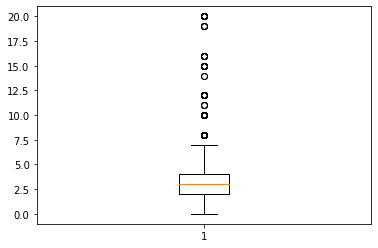

In [28]:
plt.boxplot([train['도보 10분거리 내 버스정류장 수']])
plt.show()

# 20에 가까운 값들이 존재하지만, 따로 처리해주기에는 독립적으로 떨어진 분포가 아니기 때문에, 제거하지 않는다.

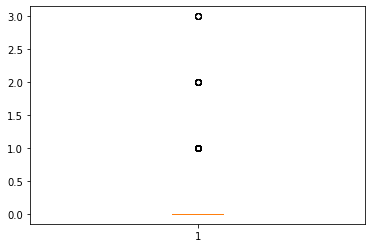

In [29]:
plt.boxplot([train['도보 10분거리 내 지하철역 수(환승노선 수 반영)']])
plt.show()

In [30]:
display('Train Data')
display(X_train.groupby(['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])['총세대수'].agg('count'))
display('='*50)
display('Test Data')
display(X_test.groupby(['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])['총세대수'].agg('count'))
display('='*50)


# 지하철 역 수가 3인 데이터는 제거한다.

'Train Data'

도보 10분거리 내 지하철역 수(환승노선 수 반영)
0.0    379
1.0     38
2.0      5
3.0      1
Name: 총세대수, dtype: int64

'=================================================='

'Test Data'

도보 10분거리 내 지하철역 수(환승노선 수 반영)
0.0    139
1.0      8
2.0      3
Name: 총세대수, dtype: int64

'=================================================='

In [31]:
display('After Engineering')
X_train = X_train[X_train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] != 3]
display(X_train.groupby(['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])['총세대수'].agg('count'))

'After Engineering'

도보 10분거리 내 지하철역 수(환승노선 수 반영)
0.0    379
1.0     38
2.0      5
Name: 총세대수, dtype: int64

- 4. 의미 없는 Feature도 확인되었다.
- "임대건물구분_아파트"의 경우 모두가 1이다.
- 해결법 : 단순 제거해준다.

In [27]:
X_train = X_train.drop(columns = ['임대건물구분_아파트'])
X_test = X_test.drop(columns = ['임대건물구분_아파트'])

encoding

In [32]:
encoding_features = ['지역', '도보 10분거리 내 지하철역 수(환승노선 수 반영)']
for f in encoding_features:
    mapping = X_train.groupby([f])['등록차량수'].agg(['mean','median','std'])
    mapping_values = []
    for l in X_train[f].values:
        mapping_values.extend([mapping.loc[l].values])
    bincount = pd.DataFrame(mapping_values, columns = [f+'_mean', f+'_median', f+'_std', ], index = X_train.index)
    X_train = pd.concat([X_train,bincount], axis= 1).drop(columns = [f])

    mapping_values = []
    for l in X_test[f].values:
        mapping_values.extend([mapping.loc[l].values])
    bincount = pd.DataFrame(mapping_values, columns = [f+'_mean', f+'_median', f+'_std', ], index = X_test.index)
    X_test = pd.concat([X_test,bincount], axis= 1).drop(columns = [f])

scailing

In [33]:
scailing_features = ['총세대수',
                     '공가수',
                     '도보 10분거리 내 버스정류장 수',
                     '단지내주차면수',
                     '지역_mean', 
                     '지역_median',
                     '지역_std', 
                     '도보 10분거리 내 지하철역 수(환승노선 수 반영)_mean',
                   '도보 10분거리 내 지하철역 수(환승노선 수 반영)_median',
                   '도보 10분거리 내 지하철역 수(환승노선 수 반영)_std'
                    ]

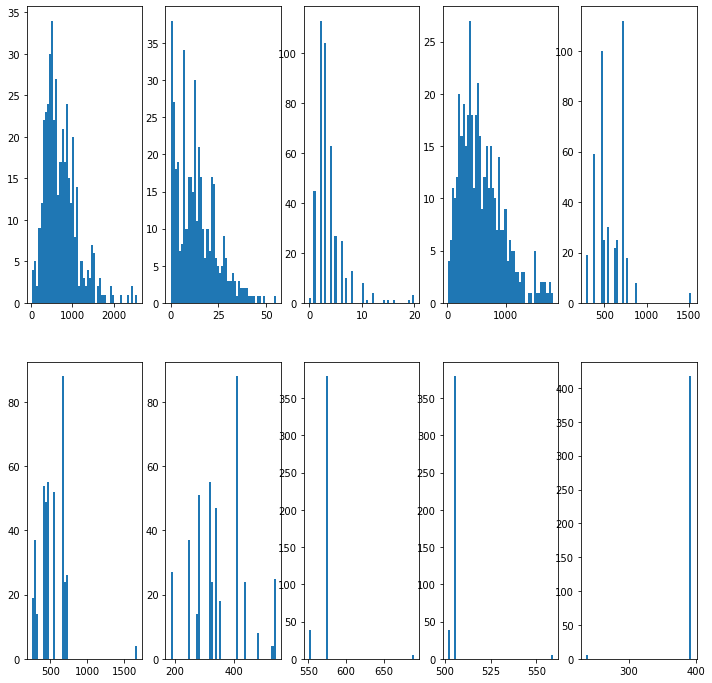

In [34]:
fig, axes = plt.subplots(2,5, figsize= (12,12))

i = 0
for f in scailing_features:
    c = i % 5
    r = i // 5
    
    axes[r,c].hist(x = f, bins =50, data = X_train)
    i += 1
plt.show()


# 지역은 이상치가 확인 => Robust Scailing
# 도보 -> std 제거
# 나머지는 Standard

In [35]:
# 도보 10분거리 std는 그림상 의미가 없기에 Drop
X_train = X_train.iloc[:,:-1]
X_test = X_test.iloc[:,:-1]

In [39]:
# 지역은  Scailing

scaler = RobustScaler()
loc_f = [    '지역_mean', 
             '지역_median',
             '지역_std', ]
X_train.loc[:, loc_f] = scaler.fit_transform(X_train[loc_f])
X_test.loc[:, loc_f] = scaler.transform(X_test[loc_f])

In [40]:
# 나머지 Scailing
scailing_features = ['총세대수',
                     '공가수',
                     '도보 10분거리 내 버스정류장 수',
                     '단지내주차면수',
                     '도보 10분거리 내 지하철역 수(환승노선 수 반영)_mean',
                       '도보 10분거리 내 지하철역 수(환승노선 수 반영)_median',
                    ]

scaler = StandardScaler()
X_train.loc[:, scailing_features] = scaler.fit_transform(X_train[scailing_features])
X_test.loc[:, scailing_features] = scaler.transform(X_test[scailing_features])

# 모델링

In [43]:
reg = setup(X_train, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행
            train_size = 0.999,  # 전체 데이터를 학습해 test를 예측하는게 목표
            target = '등록차량수',
            silent = True, # 엔터를 누르기 귀찮다
            use_gpu = True, # GPU 사용
            numeric_features=list(X_train.drop(columns = ['등록차량수']).columns), # 모든 변수가 숫자로써 의미가 있다.
            session_id = 2017,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2017
1,Target,등록차량수
2,Original Data,"(422, 22)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,0
6,Transformed Train Set,"(421, 21)"
7,Transformed Test Set,"(1, 21)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [44]:
top5 = compare_models(n_select = 5, sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,121.3801,3.159798e+04,174.9574,7.860000e-01,0.3959,0.3691,1.287
gbr,Gradient Boosting Regressor,125.4365,3.288455e+04,179.1926,7.701000e-01,0.3739,0.3377,0.086
huber,Huber Regressor,125.7936,3.250309e+04,175.5774,7.856000e-01,0.4163,0.3709,0.032
lasso,Lasso Regression,126.8046,3.283602e+04,176.9398,7.799000e-01,0.4014,0.3448,0.008
br,Bayesian Ridge,126.9408,3.316428e+04,177.8981,7.783000e-01,0.4437,0.3495,0.007
et,Extra Trees Regressor,127.1644,3.416203e+04,181.9677,7.657000e-01,0.3712,0.3369,0.713
par,Passive Aggressive Regressor,127.2043,3.319968e+04,177.6400,7.801000e-01,0.4164,0.3853,0.008
ridge,Ridge Regression,127.2612,3.311639e+04,177.7535,7.786000e-01,0.4704,0.3474,0.010
llar,Lasso Least Angle Regression,127.5002,3.383279e+04,178.4731,7.782000e-01,0.3992,0.3852,0.011
lr,Linear Regression,128.1546,3.308572e+04,177.5957,7.793000e-01,0.4676,0.3670,0.008


In [45]:
models = []
for m in top5:
    models.append(tune_model(m, 
                             optimize = 'MAE', 
                             choose_better = True,
                            n_iter = 100))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,126.1592,27240.4137,165.0467,0.8162,0.5301,0.4741
1,129.6391,31281.6333,176.8661,0.6944,0.2977,0.2602
2,100.1114,16232.2904,127.4060,0.8705,0.4444,0.2884
3,111.0949,22286.6826,149.2872,0.7887,0.2705,0.2089
4,110.7467,26716.9634,163.4532,0.8028,0.4107,0.3782
5,156.9224,61062.2263,247.1077,0.7285,0.6551,0.2821
6,176.4111,60970.0027,246.9210,0.7026,0.5560,0.5646
7,127.7594,31395.8095,177.1886,0.7225,0.4760,0.4354
8,127.6800,35903.0907,189.4811,0.8433,0.4182,0.3409
9,102.6472,18548.5362,136.1930,0.8142,0.3739,0.2635


In [46]:
voting = blend_models(models, optimize = 'MAE')
voting = tune_model(voting, 
                 optimize = 'MAE', 
                 choose_better = True,
                 n_iter = 50)

voting = finalize_model(voting)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,115.0492,25767.7639,160.5234,0.8261,0.3823,0.3372
1,118.2717,26106.4277,161.5748,0.7449,0.2911,0.2417
2,95.7300,15193.9081,123.2636,0.8788,0.3026,0.2724
3,104.4087,20252.6188,142.3117,0.8080,0.2350,0.1937
4,117.2036,27792.8470,166.7119,0.7948,0.5192,0.5901
5,135.3132,53316.4497,230.9036,0.7629,0.2863,0.2109
6,166.6912,54443.3056,233.3309,0.7344,0.5565,0.5973
7,120.5598,29627.4109,172.1261,0.7381,0.4348,0.3965
8,121.5307,36160.7885,190.1599,0.8422,0.3639,0.2937
9,93.2306,15278.0685,123.6045,0.8470,0.3618,0.2780


In [48]:
voting

VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7f7695cd0e90>),
                            ('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.05,
                                                       loss='ls', max_depth=7,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.2,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_sam

In [ ]:
sample = pd.read_csv('../data/sample_submission.csv')
layer1_pred = voting.predict(X_test)

sample.to_csv('../submissions/pycaret.csv', index=False)

제출 파일 만들기

In [49]:
sample_submission = pd.read_csv('/content/drive/MyDrive/contest/parking_data/sample_submission.csv')

In [50]:
predictions = voting.predict(X_test)

In [51]:
predictions

array([ 692.97799059, 1145.27194708,  564.5127957 ,  508.80275974,
       1047.06153679, 1811.28087178,  869.47270104,  394.83920185,
        319.82101597,  327.09070345,  447.86065362,  333.67608222,
        394.34180215,  277.49839999,  297.90946129,  285.86702545,
        506.34411897,  344.1959359 ,  138.31104293,  710.68634065,
        263.7615096 ,  375.74689494,  415.20704534,  479.40785135,
        359.74174356,  105.86408238,  164.84451888,  490.98974403,
        420.87327965,  424.12281758,  831.77589761,  163.71388981,
        513.48823648,  258.15768787,  114.60817625,  377.08522497,
        470.22956757,  579.20645155,  817.46953791,  322.61038728,
        437.07460681,  429.75179889,  419.71669704,  575.4309154 ,
        916.29133585, 1281.93717259,  495.84006015,  641.93154237,
        433.99852264,  367.21118671,  793.94683984,  310.17957199,
       1081.39618504,  613.60380076,  527.71479725,  239.96043877,
        553.34824208,  293.33258968,  459.02351563,  166.93257

In [53]:
sample_submission['num'] = predictions

In [55]:
file_name = 'parking07.csv'
sample_submission.to_csv('/content/drive/MyDrive/contest/parking_data/' + file_name, index=False)